In [42]:
# We Can Use the Logs saved from the training Notebook and the test data to evaluate the model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
sns.set_theme()

In [43]:
import torch
# Load the logs Dictionary and turn it into a DataFrame
logs  = torch.load('../logs/stratified_logs.pth')
labels, splits = [], [] # Lists to store the labels and splits
train_loss, val_loss = [], [] # Lists to store the training and validation loss
train_acc, val_acc = [], [] # Lists to store the training and validation accuracy
train_rocauc, val_rocauc = [], [] # Lists to store the training and validation AUC-ROC
train_f1, val_f1 = [], [] # Lists to store the training and validation F1 Score

for label in logs.keys():
    label_logs = logs[label]
    for split in label_logs.keys():
        split_logs = label_logs[split]
        labels.append(label)
        splits.append(split)
        train_loss.append(split_logs['train_loss'][0])
        val_loss.append(split_logs['val_loss'][0])
        train_acc.append(split_logs['train_acc'][0])
        val_acc.append(split_logs['val_acc'][0])
        train_rocauc.append(split_logs['train_rocauc'][0])
        val_rocauc.append(split_logs['val_rocauc'][0])
        train_f1.append(split_logs['train_f1'][0])
        val_f1.append(split_logs['val_f1'][0])

logs_df = pd.DataFrame({
    'label': labels,
    'split': splits,
    'train_loss': train_loss,
    'val_loss': val_loss,
    'train_acc': train_acc,
    'val_acc': val_acc,
    'train_rocauc': train_rocauc,
    'val_rocauc': val_rocauc,
    'train_f1': train_f1,
    'val_f1': val_f1
})

#Display the logs DataFrame
display(logs_df)

,label,split,train_loss,val_loss,train_acc,val_acc,train_rocauc,val_rocauc,train_f1,val_f1
0,RSF,0,1.101039,1.099335,0.642857,0.642276,0.625256,0.491680,0.503106,0.502375
1,RSF,1,1.093922,1.097353,0.028571,0.032520,0.647139,0.640915,0.001587,0.002049
2,RSF,2,1.099257,1.098243,0.028571,0.032520,0.617702,0.502057,0.001587,0.002049
3,RSF,3,1.094323,1.102455,0.030550,0.024590,0.633628,0.482454,0.001811,0.001180
4,RSF,4,1.098017,1.098944,0.030550,0.024590,0.572392,0.624435,0.001811,0.001180
5,SAF,0,1.111316,1.099685,0.151020,0.154472,0.486400,0.513093,0.039629,0.041337
6,SAF,1,1.119195,1.103561,0.153061,0.146341,0.575299,0.508865,0.040636,0.037364
7,SAF,2,1.097546,1.098425,0.697959,0.699187,0.543913,0.516756,0.573803,0.575407
8,SAF,3,1.093700,1.099407,0.150713,0.147541,0.607906,0.686432,0.039479,0.037939
9,SAF,4,1.087888,1.101490,0.150713,0.147541,0.575399,0.421637,0.039479,0.037939


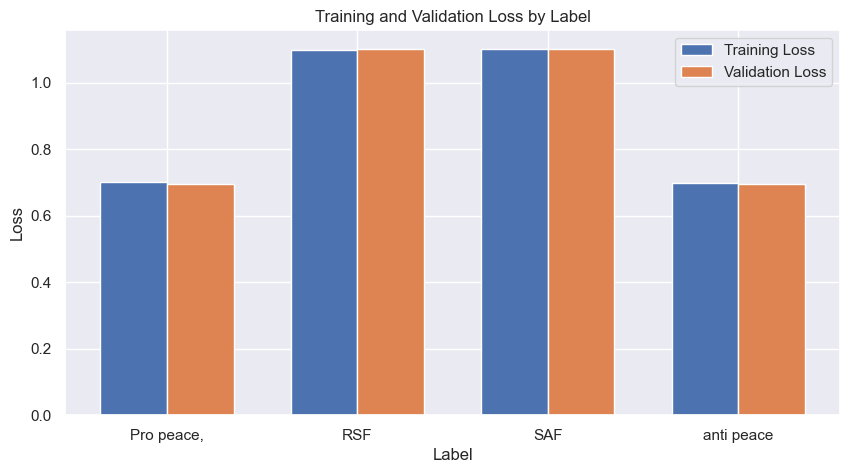

In [45]:
# First, let's plot the training and validation loss for each label avaraged over all splits
n_labels = len(logs_df['label'].unique()) # Number of labels
labels, train, val = [], [], [] # Lists to store the labels and the training and validation loss
for label, label_df in logs_df.groupby('label'):
    label_df = label_df.drop(columns=['label', 'split']).mean()
    labels.append(label)
    train.append(label_df['train_loss'])
    val.append(label_df['val_loss'])

fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(n_labels)
bar_width = 0.35
bar1 = ax.bar(x, train, bar_width, label='Training Loss')
bar2 = ax.bar(x + bar_width, val, bar_width, label='Validation Loss')
ax.set_xlabel('Label')
ax.set_ylabel('Loss')
ax.set_title('Training and Validation Loss by Label')
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()
plt.show()



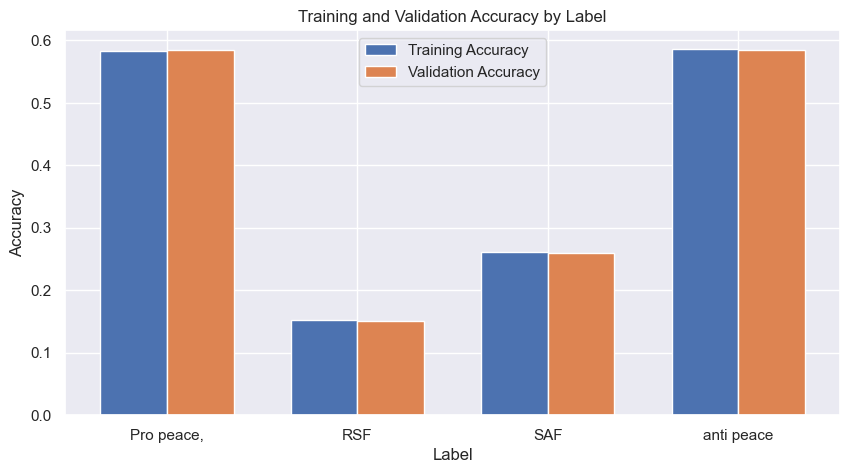

In [46]:
# Now, let's plot the training and validation accuracy for each label avaraged over all splits
labels, train, val = [], [], [] 
for label, label_df in logs_df.groupby('label'):
    label_df = label_df.drop(columns=['label', 'split']).mean()
    labels.append(label)
    train.append(label_df['train_acc'])
    val.append(label_df['val_acc'])

fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(n_labels)
bar_width = 0.35
bar1 = ax.bar(x, train, bar_width, label='Training Accuracy')
bar2 = ax.bar(x + bar_width, val, bar_width, label='Validation Accuracy')
ax.set_xlabel('Label')
ax.set_ylabel('Accuracy')
ax.set_title('Training and Validation Accuracy by Label')
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()
plt.show()



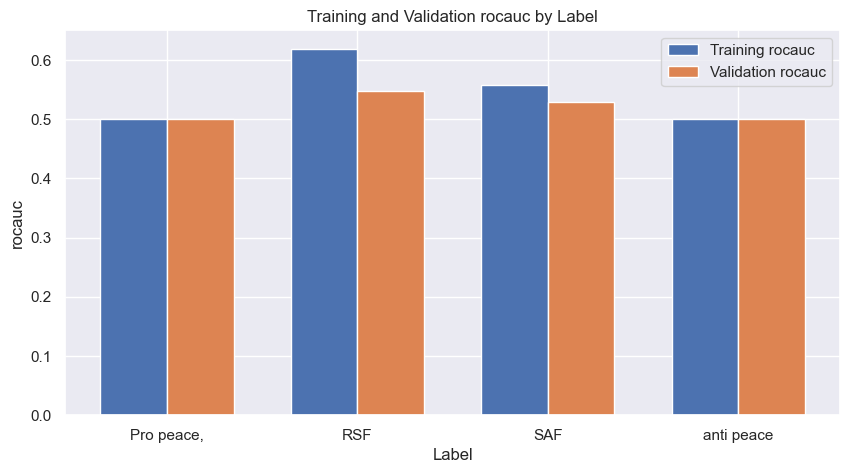

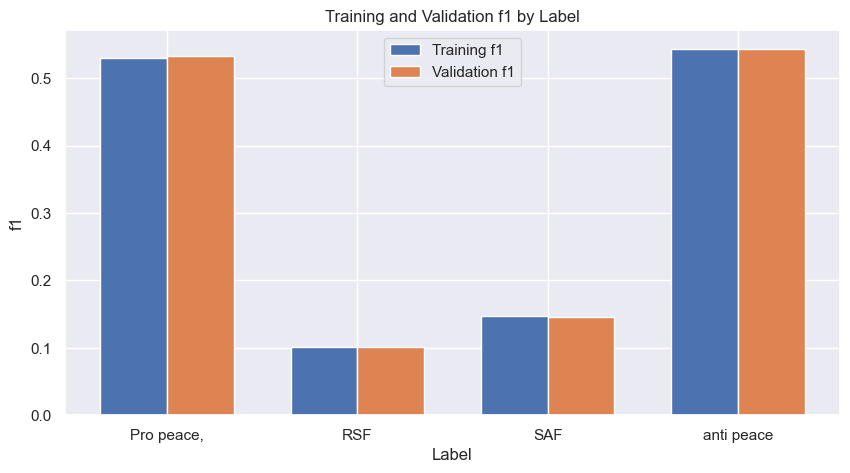

In [47]:
# We can do this for all metrics
metrics = ['rocauc', 'f1']
for metric in metrics:
    labels, train, val = [], [], [] 
    for label, label_df in logs_df.groupby('label'):
        label_df = label_df.drop(columns=['label', 'split']).mean()
        labels.append(label)
        train.append(label_df[f'train_{metric}'])
        val.append(label_df[f'val_{metric}'])

    fig, ax = plt.subplots(figsize=(10, 5))
    x = np.arange(n_labels)
    bar_width = 0.35
    bar1 = ax.bar(x, train, bar_width, label=f'Training {metric}')
    bar2 = ax.bar(x + bar_width, val, bar_width, label=f'Validation {metric}')
    ax.set_xlabel('Label')
    ax.set_ylabel(metric)
    ax.set_title(f'Training and Validation {metric} by Label')
    ax.set_xticks(x + bar_width / 2)
    ax.set_xticklabels(labels)
    ax.legend()
    plt.show()
